In [307]:
from data_storage import create_connection
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from stockstats import StockDataFrame
#from pandas_profiling import ProfileReport

In [308]:
connection = create_connection("../database/crypto_billionairs.db")

In [309]:
df = pd.read_sql_query('select * from ETHUSDT_1h_complete_history', connection)

In [310]:
df.head()

,open time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,1614556800000,1418.67,1449.99,1409.91,1440.76,48482.87160,1614560399999,6.964562e+07,45108,25561.59079,3.671704e+07,0
1,1614560400000,1440.77,1447.39,1426.30,1439.55,27214.40690,1614563999999,3.908917e+07,28258,14436.87128,2.073857e+07,0
2,1614564000000,1439.73,1456.88,1434.96,1440.05,43927.60124,1614567599999,6.347060e+07,37234,22117.08379,3.195844e+07,0
3,1614567600000,1440.31,1446.15,1431.27,1434.06,33488.96519,1614571199999,4.817392e+07,27998,16509.53282,2.375332e+07,0
4,1614571200000,1434.06,1451.92,1421.46,1441.63,33633.18294,1614574799999,4.827530e+07,31299,17087.28730,2.454022e+07,0


In [311]:
df["return"] = df['close'].pct_change() + 1 

In [312]:
#prof = ProfileReport(df)
#prof.to_file(output_file='data_profile.html')

No handles with labels found to put in legend.


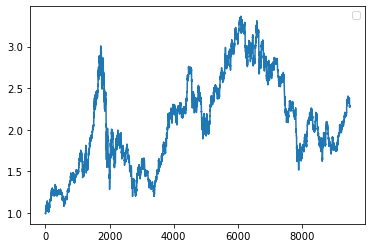

In [313]:
# Plot indexed returns.
plt.plot(np.cumprod(df["return"]))
plt.legend()
plt.show()

In [314]:
df.head()

,open time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,return
0,1614556800000,1418.67,1449.99,1409.91,1440.76,48482.87160,1614560399999,6.964562e+07,45108,25561.59079,3.671704e+07,0,NaN
1,1614560400000,1440.77,1447.39,1426.30,1439.55,27214.40690,1614563999999,3.908917e+07,28258,14436.87128,2.073857e+07,0,0.999160
2,1614564000000,1439.73,1456.88,1434.96,1440.05,43927.60124,1614567599999,6.347060e+07,37234,22117.08379,3.195844e+07,0,1.000347
3,1614567600000,1440.31,1446.15,1431.27,1434.06,33488.96519,1614571199999,4.817392e+07,27998,16509.53282,2.375332e+07,0,0.995840
4,1614571200000,1434.06,1451.92,1421.46,1441.63,33633.18294,1614574799999,4.827530e+07,31299,17087.28730,2.454022e+07,0,1.005279


In [315]:
df_ti = pd.DataFrame()
df_ti["open_time"] = df["open time"]
df_ti["open"] = df["open"]
df_ti["close"] = df["close"]
df_ti["high"] = df["high"]
df_ti["low"] = df["low"]
df_ti["volume"] = df["volume"]
df_ti["amount"] = df["quote_asset_volume"]

In [316]:
stock = StockDataFrame.retype(df_ti)

In [317]:
df["stochastic_oscillator"] = stock.get("kdjk")
df["relative_strength_index"] = stock.get("rsi_30")

### Different momentum analysis

In [318]:
def momentum(df, lag):
    return df.pct_change(periods=lag)

In [319]:
# 1 Hour Momentum
df["momentum1"] = momentum(df["close"], 12)
# 2 Hour Momentum
df["momentum2"] = momentum(df["close"], 24)
# 4 Hour Momentum
df["momentum4"] = momentum(df["close"], 48)
# 8 Hour Momentum
df["momentum8"] = momentum(df["close"], 96)
# 12 Hour Momentum
df["momentum12"] = momentum(df["close"], 144)
# 1 Day Momentum
df["momentum24"] = momentum(df["close"], 288)
# 2 Day Momentum
df["momentum48"] = momentum(df["close"], 576)
# 4 Day Momentum
df["momentum96"] = momentum(df["close"], 1152)
# 1 Week Momentum
df["momentum168"] = momentum(df["close"], 2016)

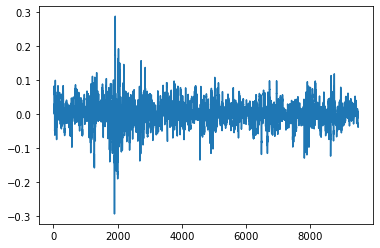

In [320]:
plt.plot(df["momentum1"])
plt.show()

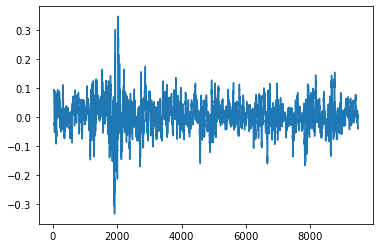

In [321]:
plt.plot(df["momentum2"])
plt.show()

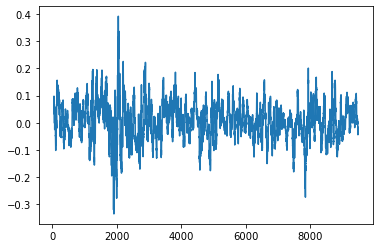

In [322]:
plt.plot(df["momentum4"])
plt.show()

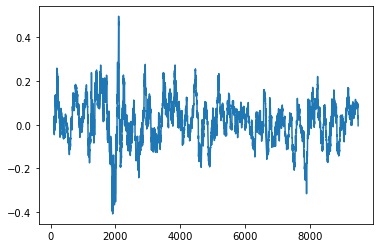

In [323]:
plt.plot(df["momentum8"])
plt.show()

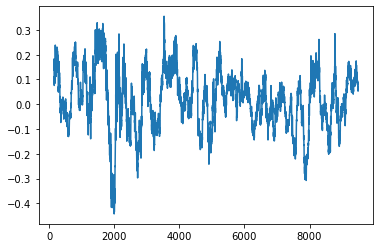

In [324]:
plt.plot(df["momentum12"])
plt.show()

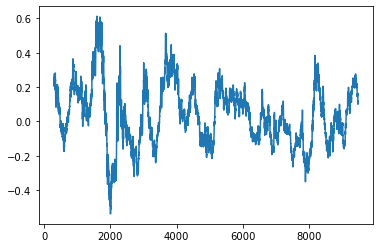

In [325]:
plt.plot(df["momentum24"])
plt.show()

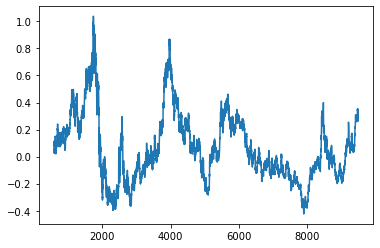

In [326]:
plt.plot(df["momentum48"])
plt.show()

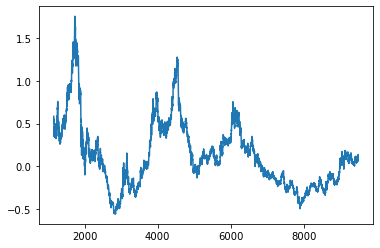

In [327]:
plt.plot(df["momentum96"])
plt.show()

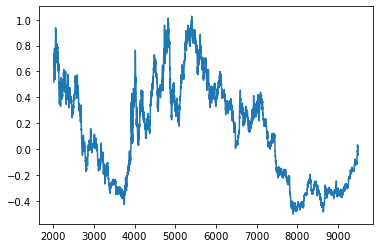

In [328]:
plt.plot(df["momentum168"])
plt.show()

### Stochastic Oscialltor and Relative Strength Index as baseline

#### Generating Buying Signals

In [329]:
df["so_group"] = df["stochastic_oscillator"].astype(str).str[0]
df["rsi_group"] = df["relative_strength_index"].astype(str).str[0]

In [330]:
pd.crosstab(df["so_group"], df["rsi_group"])

rsi_group,0,2,3,4,5,6,7,8,n
so_group,,,,,,,,,
1,0,11,206,218,19,0,0,0,0
2,0,22,292,613,184,7,0,0,0
3,0,11,160,603,445,27,0,0,0
4,0,8,108,523,614,81,1,0,0
5,0,3,79,411,618,165,2,0,1
6,1,1,45,402,632,238,6,0,0
7,0,0,19,325,733,349,17,2,0
8,0,0,10,122,487,474,52,3,0
9,0,0,8,5,35,76,17,1,0


In [331]:
df["technical_indicators"] = df["so_group"] + "/" + df["rsi_group"]

In [332]:
df_momentum8 = pd.DataFrame()
df_momentum8["technical_indicators"] = df["technical_indicators"].shift(96)
df_momentum8["momentum8"] = df["momentum8"]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_momentum8.groupby("technical_indicators").mean().where(df_momentum8.groupby("technical_indicators").mean() >= 0.02))

,momentum8
technical_indicators,
1/2,NaN
1/3,NaN
1/4,NaN
1/5,NaN
2/2,NaN
2/3,NaN
2/4,NaN
2/5,NaN
2/6,0.035329


In [333]:
df_momentum8 = pd.DataFrame()
df_momentum8["technical_indicators"] = df["technical_indicators"].shift(96)
df_momentum8["momentum8"] = df["momentum8"]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_momentum8.groupby("technical_indicators").mean().where(df_momentum8.groupby("technical_indicators").mean() >= 0.02))

,momentum8
technical_indicators,
1/2,NaN
1/3,NaN
1/4,NaN
1/5,NaN
2/2,NaN
2/3,NaN
2/4,NaN
2/5,NaN
2/6,0.035329


In [334]:
df_momentum168 = pd.DataFrame()
df_momentum168["technical_indicators"] = df["technical_indicators"].shift(2016)
df_momentum168["momentum168"] = df["momentum168"]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_momentum168.groupby("technical_indicators").mean().where(df_momentum168.groupby("technical_indicators").mean() >= 0.1))

,momentum168
technical_indicators,
1/2,0.139167
1/3,0.318241
1/4,0.248348
1/5,NaN
2/2,NaN
2/3,0.285179
2/4,0.218542
2/5,0.116262
2/6,0.181300


#### Generating selling Signals

In [335]:
#Here we tried to set a sell signal if the return to the previous 7 days is below -12%
df_momentum168 = pd.DataFrame()
df_momentum168["technical_indicators"] = df["technical_indicators"].shift(2016)
df_momentum168["momentum168"] = df["momentum168"]
sell_signals_raw = df.index.where(df["momentum168"] < - 0.12).to_list()
sell_signals = [int(x) for x in sell_signals_raw if str(x) != "nan"]

In [336]:
#lets try the same with 4 days
df_momentum96 = pd.DataFrame()
df_momentum96["technical_indicators"] = df["technical_indicators"].shift(1152)
df_momentum96["momentum96"] = df["momentum96"]
sell_signals_raw = df.index.where(df["momentum168"] < - 0.1).to_list()
sell_signals = [int(x) for x in sell_signals_raw if str(x) != "nan"]

In [337]:
df_momentum168 = pd.DataFrame()
df_momentum168["technical_indicators"] = df["technical_indicators"].shift(2016)
df_momentum168["momentum168"] = df["momentum168"]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_momentum168.groupby("technical_indicators").mean().where(df_momentum168.groupby("technical_indicators").mean() < 0))

,momentum168
technical_indicators,
1/2,NaN
1/3,NaN
1/4,NaN
1/5,NaN
2/2,NaN
2/3,NaN
2/4,NaN
2/5,NaN
2/6,NaN


### RSI Only Analysis

In [338]:
df_momentum168 = pd.DataFrame()
df_momentum168["rsi_group"] = df["rsi_group"].shift(2016)
df_momentum168["momentum168"] = df["momentum168"]
df_momentum168.groupby("rsi_group").mean()

,momentum168
rsi_group,
0,0.591539
2,0.001781
3,0.242380
4,0.174620
5,0.081274
6,0.117650
7,0.073716
8,0.669133
n,0.518518


### Backtesting (Long-Only) - Calculate the returns by applying basic rules

In [339]:
df.head()

,open time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,...,momentum4,momentum8,momentum12,momentum24,momentum48,momentum96,momentum168,so_group,rsi_group,technical_indicators
0,1614556800000,1418.67,1449.99,1409.91,1440.76,48482.87160,1614560399999,6.964562e+07,45108,25561.59079,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,n,5/n
1,1614560400000,1440.77,1447.39,1426.30,1439.55,27214.40690,1614563999999,3.908917e+07,28258,14436.87128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,0,6/0
2,1614564000000,1439.73,1456.88,1434.96,1440.05,43927.60124,1614567599999,6.347060e+07,37234,22117.08379,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2,6/2
3,1614567600000,1440.31,1446.15,1431.27,1434.06,33488.96519,1614571199999,4.817392e+07,27998,16509.53282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,6,5/6
4,1614571200000,1434.06,1451.92,1421.46,1441.63,33633.18294,1614574799999,4.827530e+07,31299,17087.28730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,5,6/5


In [340]:
#lets build an example of 1 week momentum and see when our indicators appear
df["buy_indicator"] = 0

buy_indicators = ["3/2", "4/2", "5/2", "8/3", "9/4", "9/7", "9/6"]#["6/0", "6/2","7/8", "8/8"]
for buy_indicator in buy_indicators:
    df.loc[df["technical_indicators"] == buy_indicator, 'buy_indicator'] = 1

In [341]:
df["sell_indicator"] = 0

sell_indicators = ["3/2", "4/2", "5/2", "8/3", "9/4", "9/7", "9/6"]#["6/0", "6/2","7/8", "8/8"]
for sell_indicator in sell_indicators:
    df.loc[df["technical_indicators"].shift(96) == sell_indicator, 'sell_indicator'] = 1


In [342]:
buy_colors = []
for value in df["buy_indicator"]:
    if value == 1:
        buy_colors.append("r")
    else:
        buy_colors.append("None")

In [343]:
sell_colors = []
for value in df["sell_indicator"]:
    if value == 1:
        sell_colors.append("g")
    else:
        sell_colors.append("None")

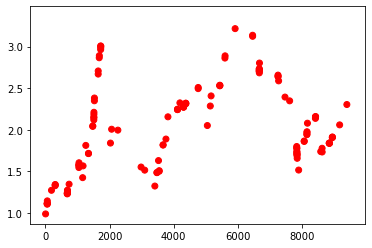

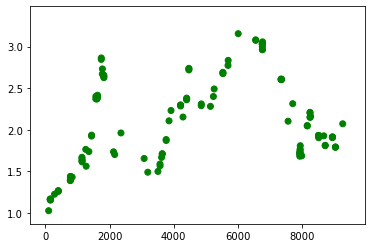

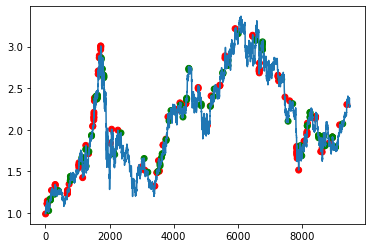

In [344]:
plt.scatter(list(range(len(df))), np.cumprod(df["return"]), c=buy_colors)
plt.show()
plt.scatter(list(range(len(df))), np.cumprod(df["return"]), c=sell_colors)
plt.show()
plt.scatter(list(range(len(df))), np.cumprod(df["return"]), c=buy_colors)
plt.scatter(list(range(len(df))), np.cumprod(df["return"]), c=sell_colors)
plt.plot(np.cumprod(df["return"]))
plt.show()

In [345]:
def calculate_cumulated_return(df, start_sum):

    money = start_sum
    money_history = []
    sell_index = 0

    for index, row in df[['close', 'buy_indicator', 'sell_indicator']].iterrows():
        

        if row["buy_indicator"] == 1 and money != 0 and index > sell_index:
            assets = money / row["close"]
            money = 0
            buy_index = index
            sell_index = buy_index + 2015

        if sell_index == index and money == 0: 
            money = assets * df["close"][sell_index]
            money_history.append(money / start_sum)
            assets = 0

        
        if len(df) - 1 == index and assets != 0:
            money = assets * row["close"]
            money_history.append(money / start_sum)
            assets = 0

    return money / start_sum, money_history

result, hist = calculate_cumulated_return(df, 1000000)

In [346]:
print(max(hist))

2.9589644721884056


In [347]:
print(result)

2.5589733750195562


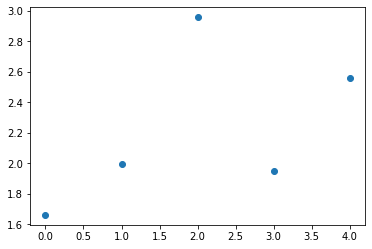

In [348]:
plt.scatter(list(range(len(hist))), hist)
plt.show()

In [349]:
df.to_sql("ETHUSDT_1h_complete_history_long", connection, if_exists="replace")

C:\Users\janfa\anaconda3\lib\site-packages\pandas\core\generic.py:2653: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [350]:
#sharp ratio, sortino ratio, maximum drawdown, carl mar ratio 

#last value predictor

#### Backtesting (Long-Stopp-Loss) - Calculate the return applying basic rules

In [351]:
#lets build an example of 1 week momentum and see when our indicators appear
df["buy_indicator"] = 0
buy_indicators = ["3/2", "4/2", "5/2", "8/3", "9/4", "9/7", "9/6"]
for buy_indicator in buy_indicators:
    df.loc[df["technical_indicators"] == buy_indicator, 'buy_indicator'] = 1

In [352]:
# df["sell_indicator"] = 0
# sell_indicators = ["5/1", "6/1", "7/1", "0/2", "0/3", "9/8", "0/3"]
                   
# for sell_indicator in sell_indicators:
#     df.loc[df["technical_indicators"].shift(288) == sell_indicator, 'sell_indicator'] = 1

In [353]:
#lets try the same with 2 days
df_momentum48 = pd.DataFrame()
df_momentum48["technical_indicators"] = df["technical_indicators"].shift(96)
df_momentum48["momentum48"] = df["momentum48"]
sell_signals_raw = df.index.where(df["momentum48"] < - 0.105).to_list()
sell_signals = [int(x) for x in sell_signals_raw if str(x) != "nan"]

df["sell_indicator"] = 0
df["sell_indicator"].iloc[sell_signals] = 1

In [354]:
df["sell_indicator"] = 0
df["sell_indicator"].iloc[sell_signals] = 1

C:\Users\janfa\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [355]:
buy_colors = []
for value in df["buy_indicator"]:
    if value == 1:
        buy_colors.append("r")
    else:
        buy_colors.append("None")

In [356]:
sell_colors = []
for value in df["sell_indicator"]:
    if value == 1:
        sell_colors.append("g")
    else:
        sell_colors.append("None")

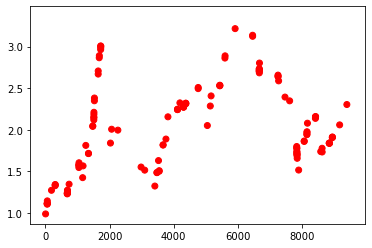

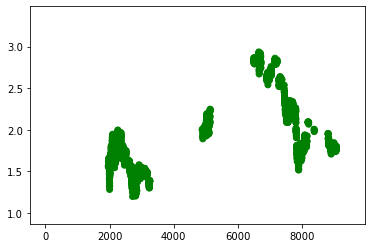

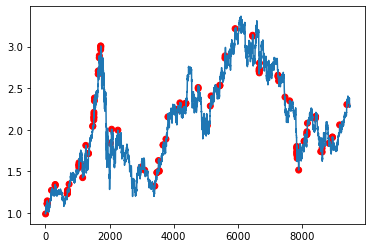

In [357]:
plt.scatter(list(range(len(df))), np.cumprod(df["return"]), c=buy_colors)
plt.show()
plt.scatter(list(range(len(df))), np.cumprod(df["return"]), c=sell_colors)
plt.show()
plt.scatter(list(range(len(df))), np.cumprod(df["return"]), c=buy_colors)
plt.plot(np.cumprod(df["return"]))
plt.show()

In [358]:
def calculate_cumulated_return(df, start_sum):

    money = start_sum
    money_history = []

    for index, row in df[['close', 'buy_indicator', 'sell_indicator']].iterrows():
        

        if row["buy_indicator"] == 1 and money != 0:
            assets = money / row["close"]
            money = 0
            

        if row["sell_indicator"] == 1 and money == 0: 
            money = assets * row["close"]
            money_history.append(money / start_sum)
            assets = 0

        
        if len(df) - 1 == index and assets != 0:
            money = assets * row["close"]
            money_history.append(money / start_sum)
            assets = 0

    return money / start_sum, money_history

result, hist = calculate_cumulated_return(df, 1000000)

In [359]:
print(max(hist))

2.507999998380766


In [360]:
print(result)

2.2753186311186746


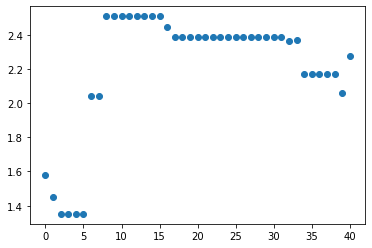

In [361]:
plt.scatter(list(range(len(hist))), hist)
plt.show()

In [362]:
df.to_sql("ETHUSDT_1h_complete_history_long_stop_loss", connection, if_exists="replace")

#### Long Short

In [363]:
#lets build an example of 1 week momentum and see when our indicators appear
df["buy_indicator"] = 0
buy_indicators = ["3/2", "4/2", "5/2", "8/3", "9/4", "9/7", "9/6", "2/6", "3/6", "7/7"]
for buy_indicator in buy_indicators:
    df.loc[df["technical_indicators"] == buy_indicator, 'buy_indicator'] = 1

In [442]:
df["sell_indicator"] = 0

sell_indicators = ["9/8", "7/3", "7/8", "7/3", "6/3", "5/7", "3/3", "2/2", "3/2"]
for sell_indicator in sell_indicators:
    df.loc[df["technical_indicators"].shift(96) == sell_indicator, 'sell_indicator'] = 1

In [451]:
df_momentum48 = pd.DataFrame()
df_momentum48["technical_indicators"] = df["technical_indicators"].shift(96)
df_momentum48["momentum48"] = df["momentum48"]
sell_signals_raw = df.index.where(df["momentum48"] < - 0.17).to_list()
sell_signals = [int(x) for x in sell_signals_raw if str(x) != "nan"]

#df["sell_indicator"] = 0
df["sell_indicator"].iloc[sell_signals] = 1

In [452]:
buy_colors = []
for value in df["buy_indicator"]:
    if value == 1:
        buy_colors.append("r")
    else:
        buy_colors.append("None")

In [453]:
sell_colors = []
for value in df["sell_indicator"]:
    if value == 1:
        sell_colors.append("g")
    else:
        sell_colors.append("None")

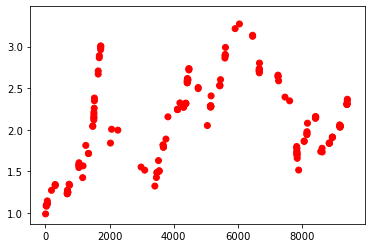

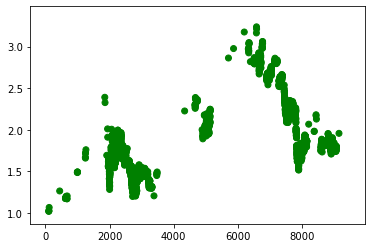

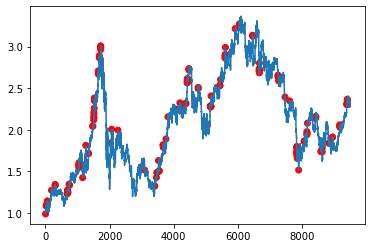

In [454]:
plt.scatter(list(range(len(df))), np.cumprod(df["return"]), c=buy_colors)
plt.show()
plt.scatter(list(range(len(df))), np.cumprod(df["return"]), c=sell_colors)
plt.show()
plt.scatter(list(range(len(df))), np.cumprod(df["return"]), c=buy_colors)
plt.plot(np.cumprod(df["return"]))
plt.show()

In [455]:
def calculate_cumulated_return(df, start_sum):

    money = start_sum
    money_history = []

    for index, row in df[['close', 'buy_indicator', 'sell_indicator']].iterrows():
        

        if row["buy_indicator"] == 1 and money != 0:
            assets = money / row["close"]
            money = 0
            

        if row["sell_indicator"] == 1 and money == 0: 
            money = assets * row["close"]
            money_history.append(money / start_sum)
            assets = 0

        
        if len(df) - 1 == index and assets != 0:
            money = assets * row["close"]
            money_history.append(money / start_sum)
            assets = 0

    return money / start_sum, money_history

result, hist = calculate_cumulated_return(df, 1000000)

In [456]:
print(max(hist))

2.501449864263295


In [457]:
print(result)

2.501449864263295


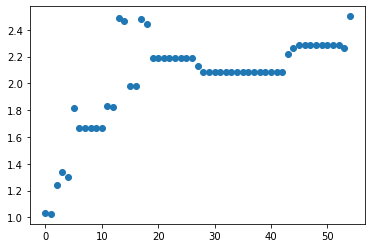

In [450]:
plt.scatter(list(range(len(hist))), hist)
plt.show()

In [415]:
df.to_sql("ETHUSDT_1h_complete_history_long_short", connection, if_exists="replace")